**Named Entity Recognition (NER)**

What is **NER**?
*   NER is a natural language processing task used to identify important **named entities** in the text.
    - such as people, places, organizations, dates, states,
    - and other categories depending on the used libraries and notation.

*   NER can be used alongside topic identification
*   NER can be used to
    - determine important items in a text and
    - answer basic **NLU questions** such as **who**? **what**? **when**? and **where**?


**[nltk](https://www.nltk.org/) (Natural Language Toolkit)**
- a leading platform for building Python programs to work with human language data.
- a suite of text processing libraries for classification, tokenization, stemming, tagging,...



Using **nltk** for **Named Entity Recognition**

- **averaged_perceptron_tagger**: contains the pre-trained English [Part-of-Speech (**POS**)]
- **maxent_ne_chunker**: a model used for Named Entity Recognition (**NER**). This model is trained to identify named entities such as people, organizations, locations, and other proper nouns in text.

[POS Tagging with NLTK and Chunking in NLP [EXAMPLES]](https://www.guru99.com/pos-tagging-chunking-nltk.html)

In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [7]:
# Sample text
sentence = 'On the 15th of September, Tim Cook announced that Apple wants to acquire ABC Group from New York for 1 billion dollars.'

# Tokenize the text into words
tokenized_sent = nltk.word_tokenize(sentence)

# Perform POS tagging
tagged_sent = nltk.pos_tag(tokenized_sent)

# Perform NER using nltk's pre-trained NE chunker
named_entities = nltk.ne_chunk(tagged_sent)

# Print the named entities
print(named_entities)

(S
  On/IN
  the/DT
  15th/CD
  of/IN
  September/NNP
  ,/,
  (PERSON Tim/NNP Cook/NNP)
  announced/VBD
  that/IN
  (PERSON Apple/NNP)
  wants/VBZ
  to/TO
  acquire/VB
  (ORGANIZATION ABC/NNP Group/NNP)
  from/IN
  (GPE New/NNP York/NNP)
  for/IN
  1/CD
  billion/CD
  dollars/NNS
  ./.)


In [8]:
# Create a list to store the names and types of Named Entities
named_entities_list = []

# Traverse the Tree structure of named_entities
for subtree in named_entities:
    if isinstance(subtree, nltk.Tree):  # Check if the element is a Tree (indicating a Named Entity)
        entity_name = " ".join([token for token, pos in subtree.leaves()])  # Join tokens to form the full name of the entity
        entity_type = subtree.label()  # Get the type of the entity (e.g., PERSON, ORGANIZATION, GPE)
        named_entities_list.append((entity_name, entity_type))  # Add the name and type as a tuple to the list

# Print out the names and types of Named Entities
for entity_name, entity_type in named_entities_list:
    print(f"{entity_name} - {entity_type}")

Tim Cook - PERSON
Apple - PERSON
ABC Group - ORGANIZATION
New York - GPE


- Test with TXT file

In [9]:
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Read the content of the uploaded file
with io.StringIO(uploaded['tim_cook.txt'].decode('utf-8')) as f:
    article = f.read()

# Display the content
print(article)

Saving tim_cook.txt to tim_cook.txt
Tim Cook
Chief Executive Officer

Tim Cook is the CEO of Apple and serves on its board of directors.

Before being named CEO in August 2011, Tim was Apple’s chief operating officer and was responsible for all of the company’s worldwide sales and operations, including end-to-end management of Apple’s supply chain, sales activities, and service and support in all markets and countries. He also headed Apple’s Macintosh division and played a key role in the continued development of strategic reseller and supplier relationships, ensuring flexibility in response to an increasingly demanding marketplace.

Prior to joining Apple, Tim was vice president of Corporate Materials for Compaq and was responsible for procuring and managing all of Compaq’s product inventory.

Previous to his work at Compaq, Tim was the chief operating officer of the Reseller Division at Intelligent Electronics.

Tim also spent 12 years with IBM, most recently as director of North Ame

In [10]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE CEO/NNP)
(NE Tim/NNP)
(NE Apple/NNP)
(NE Apple/NNP)
(NE Apple/NNP)
(NE Macintosh/NNP)
(NE Apple/NNP)
(NE Tim/NNP)
(NE Corporate/NNP)
(NE Compaq/NNP)
(NE Compaq/NNP)
(NE Compaq/NNP)
(NE Tim/NNP)
(NE Reseller/NNP Division/NNP)
(NE Intelligent/NNP Electronics/NNP)
(NE Tim/NNP)
(NE IBM/NNP)
(NE North/JJ)
(NE American/JJ)
(NE IBM/NNP)
(NE Personal/NNP Computer/NNP Company/NNP)
(NE North/NNP)
(NE Latin/NNP America/NNP)
(NE Tim/NNP)
(NE Duke/NNP University/NNP)
(NE Fuqua/NNP Scholar/NNP)
(NE Science/NNP)
(NE Industrial/NNP Engineering/NNP)
(NE Auburn/NNP University/NNP)


**binary=True:**

- Named entities are labeled as "NE" (Named Entity) regardless of their specific type. This provides a simpler classification and does not differentiate between different types of named entities.
- Simplifies the classification by **tagging all entities as "NE"**, regardless of type.

**binary=False:**

- Provides detailed labels for named entities, allowing you to know exactly what type of entity has been recognized in the text such as PERSON, ORGANIZATION, GPE (Geo-Political Entity), LOCATION, etc.


**enumerate()**

- used to iterate over a sequence (like a list, tuple, or string) while keeping track of the index of the current item.
- returns an iterator that produces pairs of the form **(index, item)** where
    - **index** is the position of the item in the sequence
    - **item** is the value at that position.


In [12]:
# Named Entity Recognition with detailed labels
chunked_sentences = list(nltk.ne_chunk_sents(pos_sentences, binary=False))

# Print the first 1 chunked sentences
for i, sent in enumerate(chunked_sentences[:1]):
    print(f"Chunked Sentence {i+1}:")
    print(sent)
    for chunk in sent:
        if hasattr(chunk, "label"):
            print("chunk:",chunk)
    print("\n")

# Extract and print Named Entities with their types
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            entity_name = " ".join(c[0] for c in chunk)  # Combine words in the chunk
            entity_type = chunk.label()  # Get the NE label
            print(f"Entity: {entity_name}, Type: {entity_type}")

Chunked Sentence 1:
(S
  (PERSON Tim/NNP)
  (ORGANIZATION Cook/NNP)
  Chief/NNP
  Executive/NNP
  Officer/NNP
  (PERSON Tim/NNP Cook/NNP)
  is/VBZ
  the/DT
  (ORGANIZATION CEO/NNP)
  of/IN
  (GPE Apple/NNP)
  and/CC
  serves/VBZ
  on/IN
  its/PRP$
  board/NN
  of/IN
  directors/NNS
  ./.)
chunk: (PERSON Tim/NNP)
chunk: (ORGANIZATION Cook/NNP)
chunk: (PERSON Tim/NNP Cook/NNP)
chunk: (ORGANIZATION CEO/NNP)
chunk: (GPE Apple/NNP)


Entity: Tim, Type: PERSON
Entity: Cook, Type: ORGANIZATION
Entity: Tim Cook, Type: PERSON
Entity: CEO, Type: ORGANIZATION
Entity: Apple, Type: GPE
Entity: CEO, Type: ORGANIZATION
Entity: Tim, Type: PERSON
Entity: Apple, Type: PERSON
Entity: Apple, Type: PERSON
Entity: Apple, Type: PERSON
Entity: Macintosh, Type: PERSON
Entity: Apple, Type: PERSON
Entity: Tim, Type: PERSON
Entity: Corporate, Type: ORGANIZATION
Entity: Compaq, Type: ORGANIZATION
Entity: Compaq, Type: ORGANIZATION
Entity: Compaq, Type: ORGANIZATION
Entity: Tim, Type: PERSON
Entity: Reseller Divisi

['PERSON', 'ORGANIZATION', 'GPE']


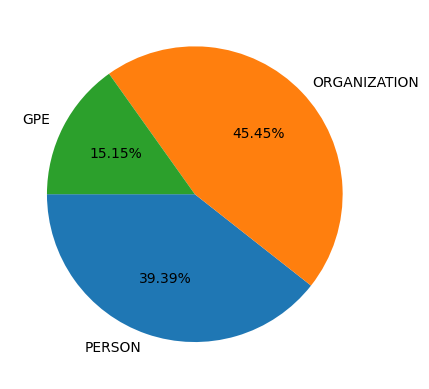

In [ ]:
from collections import defaultdict
from matplotlib import pyplot as plt

chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())
print(labels)

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=180)

# Display the chart
plt.show()
